In [141]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Handle date-time
import datetime as dt
import matplotlib.dates as mdates

from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data
from datetime import date, timedelta


In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [232]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results= session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()

In [233]:
results

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [234]:
#  3. Convert the June temperatures to a list.  It is a list...
res = []
for i in range(len(results)):
    if int(results[i][0][0:7][-2:]) == 6:
        res += [(results[i])]

In [235]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(res)

In [236]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

1
count  1700.000000
mean     74.944118
std       3.257417
min      64.000000
25%      73.000000
50%      75.000000
75%      77.000000
max      85.000000

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results = session.query(Measurement.date, Measurement.tobs).\
filter( Measurement.date ).all()

In [9]:
# 7. Convert the December temperatures to a list.
res = []
for i in range(len(results)):
    if int(results[i][0][0:7][-2:]) == 12:
        res += [(results[i])]

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(res)

In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

1
count  1517.000000
mean     71.041529
std       3.745920
min      56.000000
25%      69.000000
50%      71.000000
75%      74.000000
max      83.000000

## Supplemental Analyses

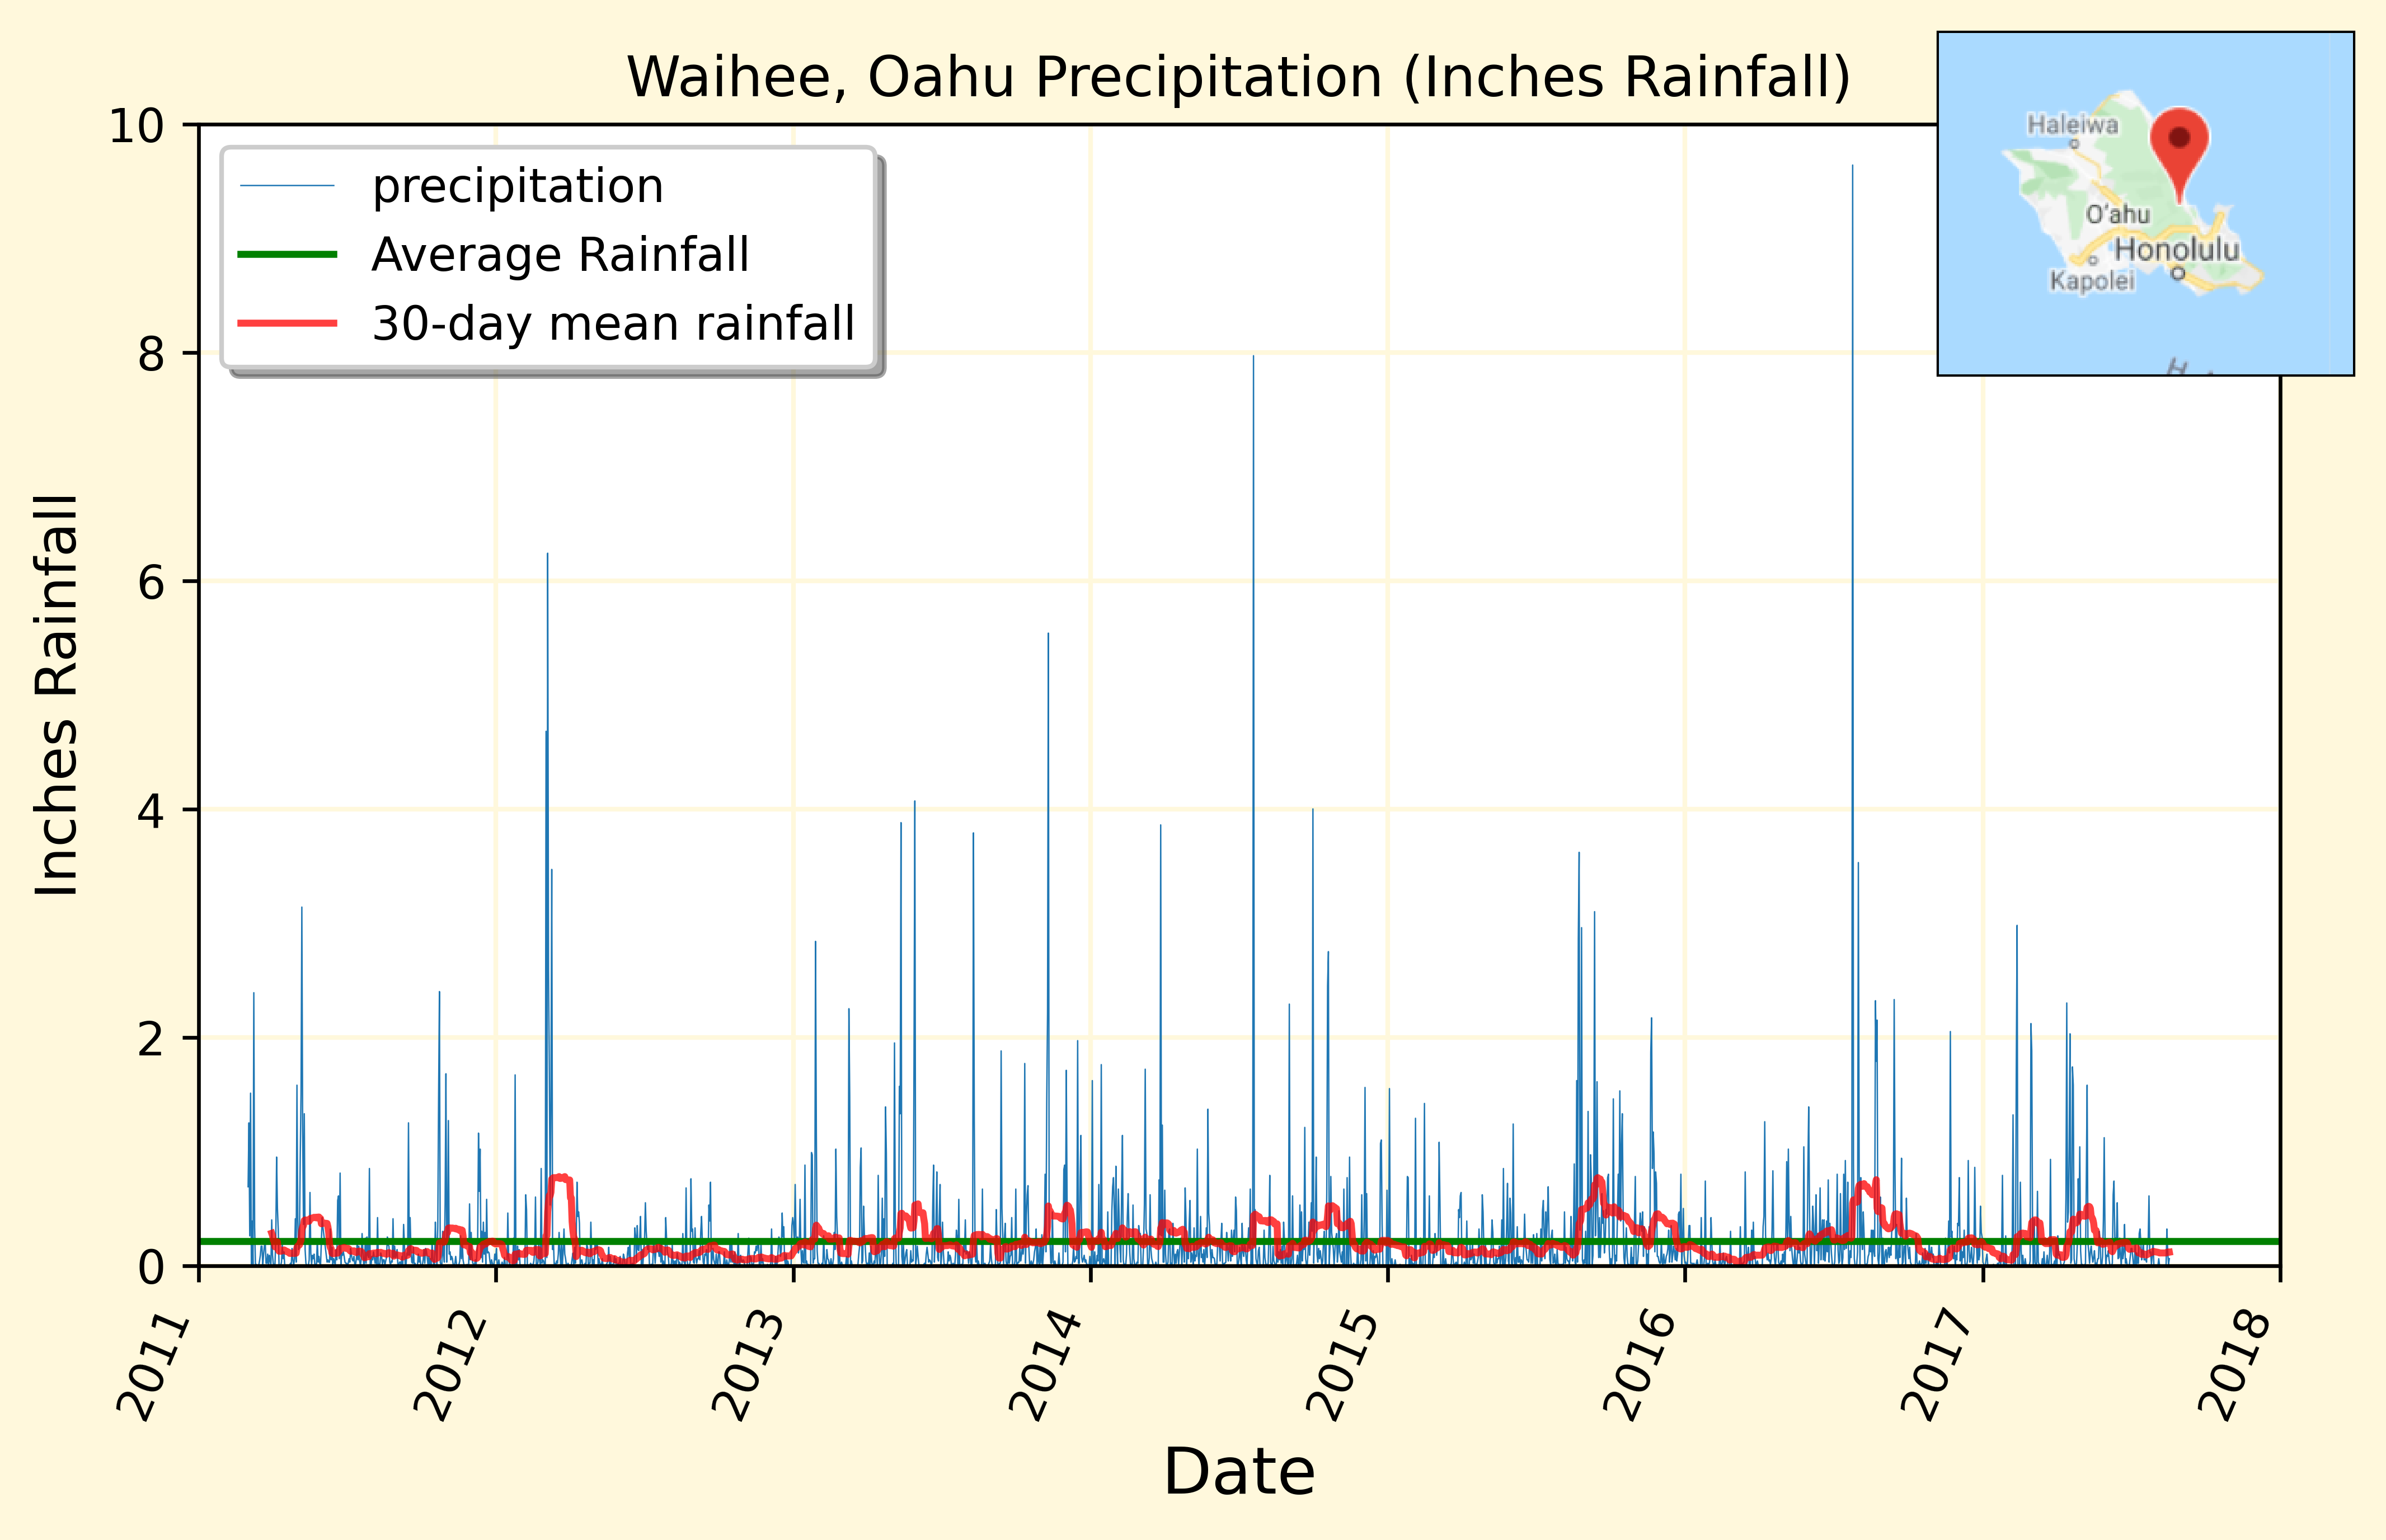

In [57]:
# Calculate many days back from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=2365)
# Perform a query to retrieve the data and precipitation scores
results = []

# Use data from most active WX station
results = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(pd.to_datetime(df['date']), inplace=True)

# Sort the dataframe by date
df = df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(lw=.3)
meanrain = df.describe(include='all').loc['mean']['precipitation']
plt.axhline(y=meanrain, color='g', linestyle='-', label='Average Rainfall')

plt.gca().tick_params(axis="x", which="both", rotation=67)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.xlabel('Date', fontsize=14)
plt.ylabel('Inches Rainfall', fontsize=12)

plt.ylim(bottom=0,top=10)
plt.xlim(left=pd.to_datetime('2011-01-01'),right=pd.to_datetime('2018-01-01'))

plt.gcf().patch.set_facecolor('cornsilk')
plt.gcf().patch.set_alpha(1)

plt.gcf().set_size_inches(8, 5)
plt.gcf().set_dpi(600)
plt.plot(df.rolling(30).mean(),label='30-day mean rainfall',alpha=.75,c='r')

plt.title('Waihee, Oahu Precipitation (Inches Rainfall)')

plt.gca().grid(which='major', color='cornsilk',  linewidth=1, alpha=1)  
plt.legend(fontsize='medium', shadow=True)

arr_img = plt.imread("Resources/oahu1.png", format='png')

imagebox = OffsetImage(arr_img, zoom=0.4)
imagebox.image.axes = plt.gca()
xy = (pd.to_datetime('2017-07-20'), 9.3)
ab = AnnotationBbox(imagebox, xy,
                        xybox=(0, 0.),
                        xycoords='data',
                        boxcoords="offset points",
                        pad=0.0
                        )

plt.gca().add_artist(ab)
 

plt.savefig('Resources/rain.png')
plt.show()
plt.close()

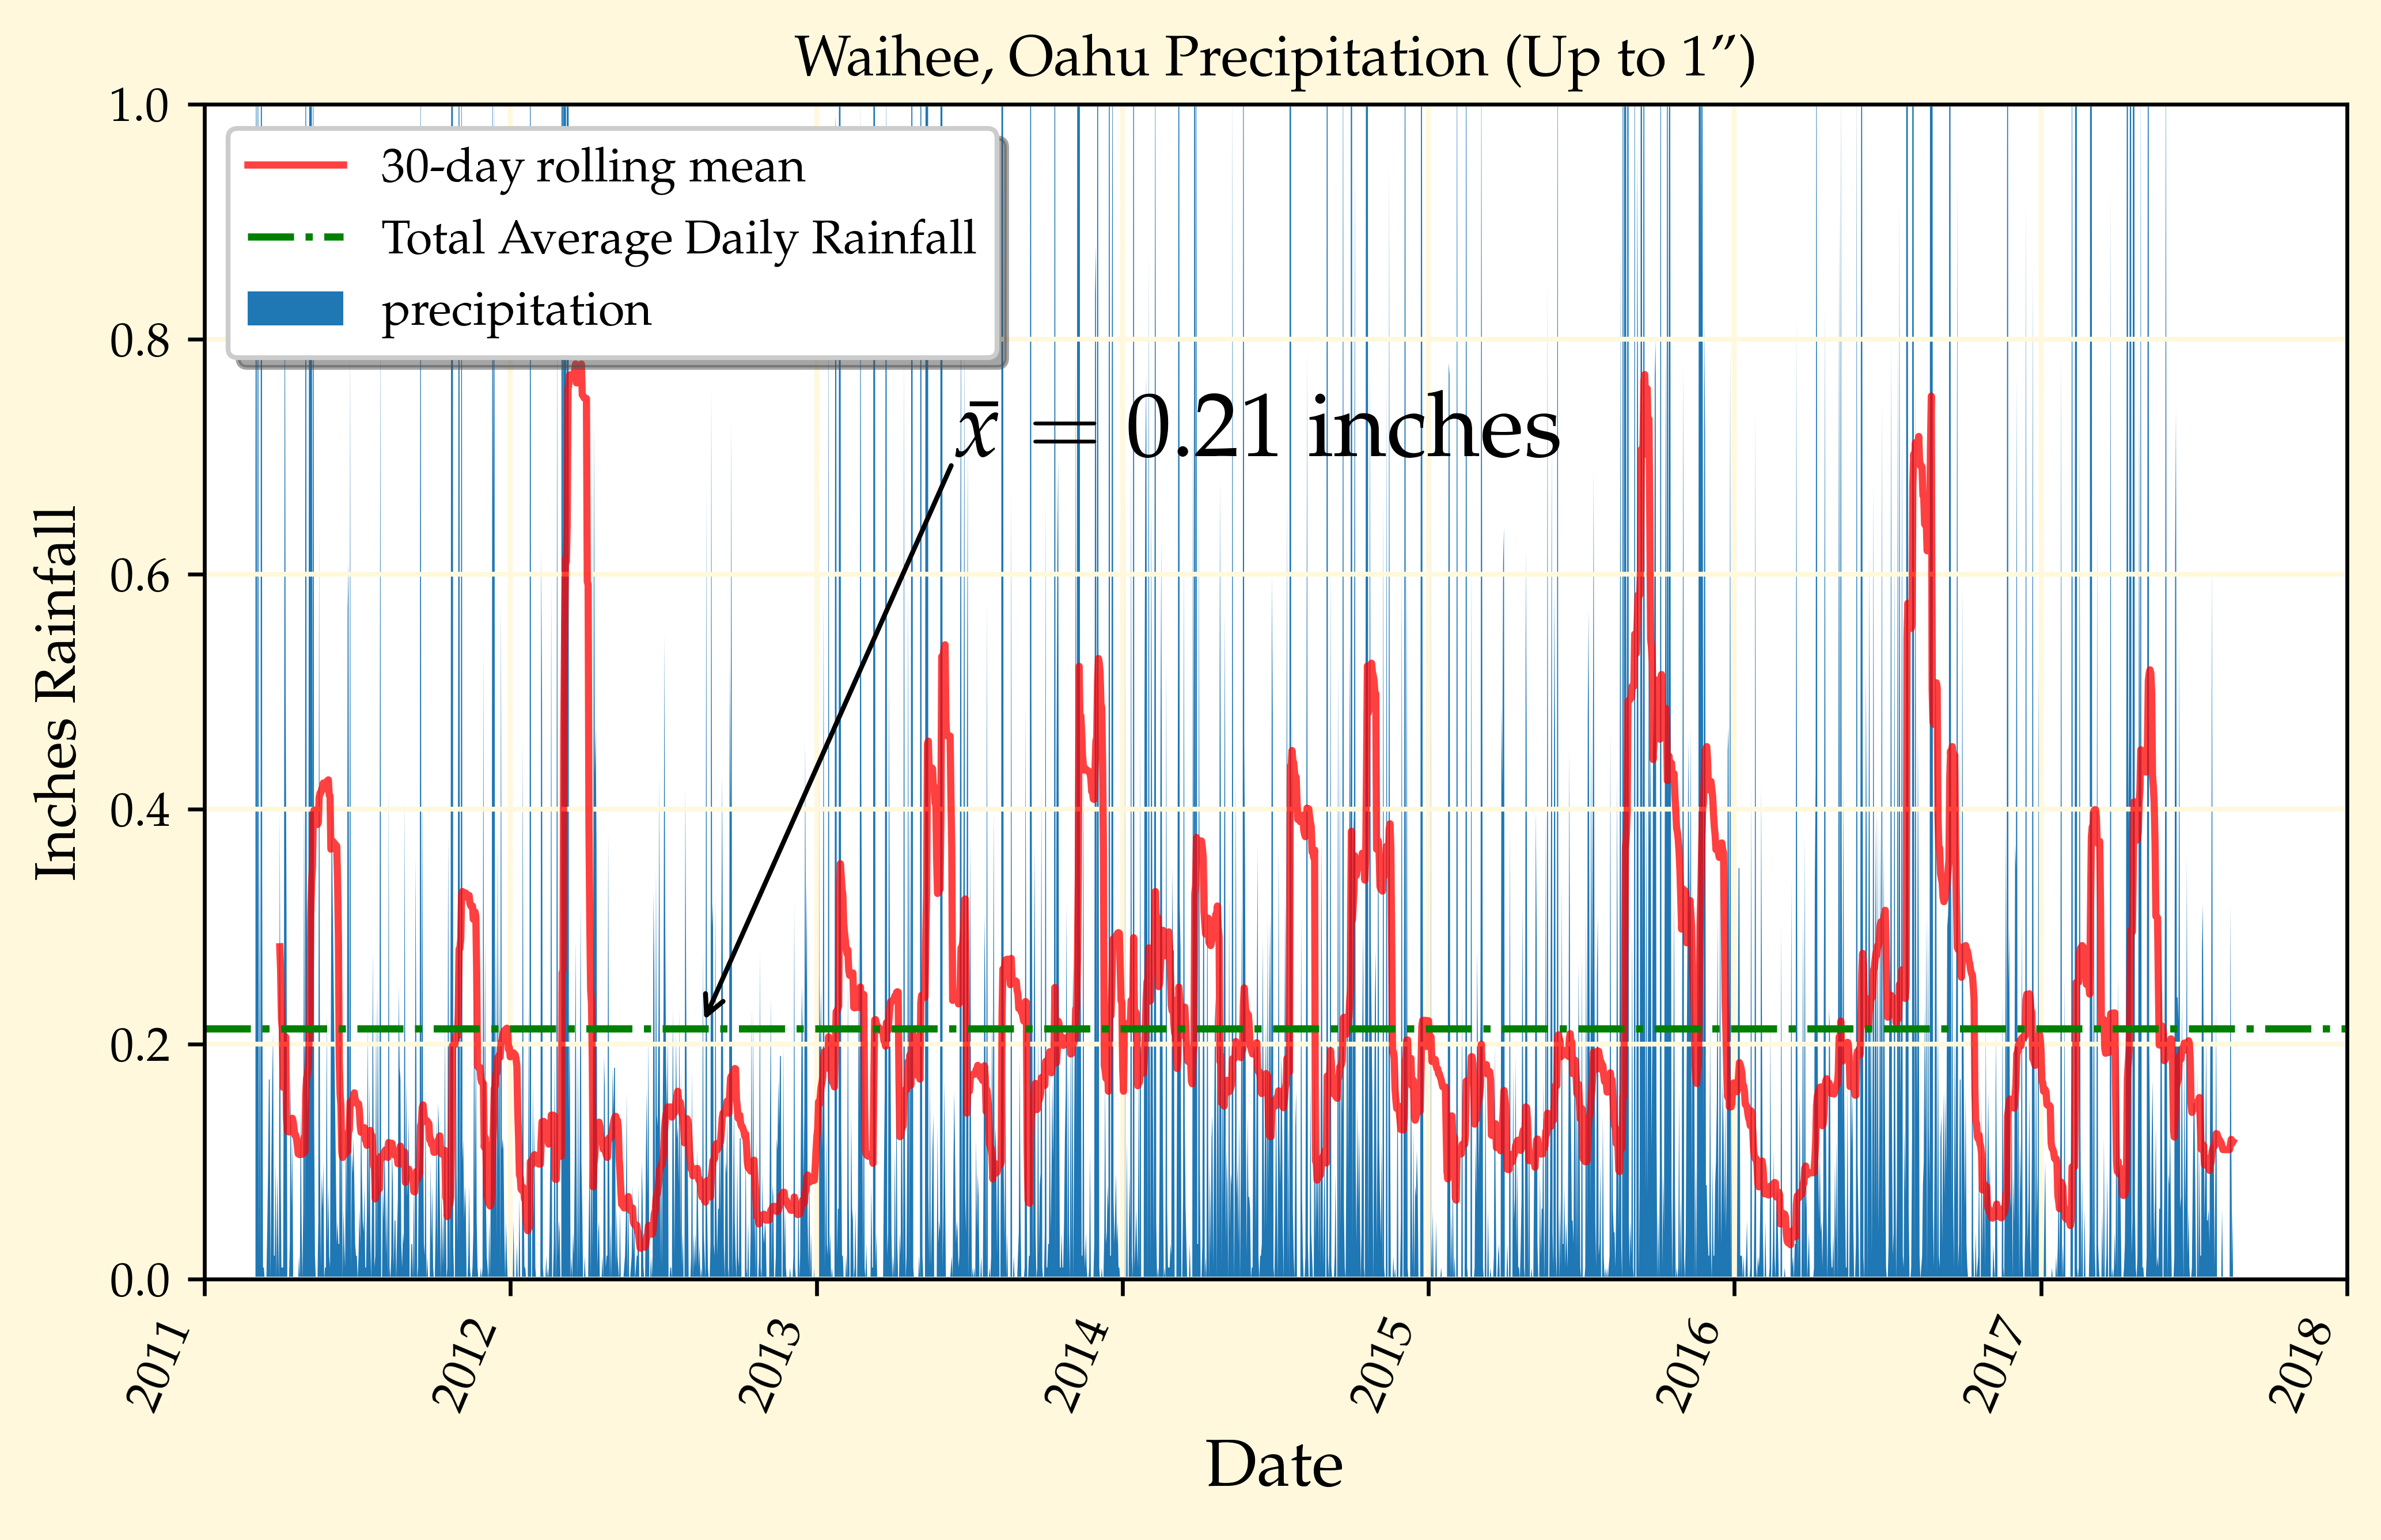

In [60]:
import matplotlib.mathtext
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

# Use Pandas Plotting with Matplotlib to plot the data
df.plot.area(lw=0,label='Precipitation')

plt.gca().tick_params(axis="x", which="both", rotation=67)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.xlabel('Date', fontsize=14)
plt.ylabel('Inches Rainfall', fontsize=12)

plt.ylim(bottom=0,top=1)
plt.xlim(left=pd.to_datetime('2011-01-01'),right=pd.to_datetime('2018-01-01'))

plt.gcf().patch.set_facecolor('cornsilk')
plt.gcf().patch.set_alpha(1)

plt.gcf().set_size_inches(8, 5)
plt.gcf().set_dpi(600)
plt.plot(df.rolling(30).mean(),label='30-day rolling mean',alpha=.75,c='r')

meanrain = df.describe(include='all').loc['mean']['precipitation']
plt.axhline(y=meanrain, color='g', linestyle='-.', label='Total Average Daily Rainfall')

plt.annotate("", xy=(pd.to_datetime('2012-08-15'),meanrain),xytext=(pd.to_datetime('2013-06-15'), .7), arrowprops=dict(arrowstyle="->"))

tfont = {'fontname':'Times New Roman'}
plt.text(pd.to_datetime('2013-06-15'),.7,r' $\bar x = $'+' '+str(round(meanrain,2))+' inches',**tfont,style='italic',fontsize=19)

plt.gca().grid(which='major', color='cornsilk',  linewidth=1, alpha=1)  
plt.legend(fontsize='medium', shadow=True)

plt.title('Waihee, Oahu Precipitation (Up to 1")')

plt.savefig('Resources/rainzoom.png')
plt.show()
plt.close()

In [15]:
df.describe(include='all').loc['mean']['precipitation']

0.21327226246271838

In [16]:
df.describe()

precipitation
count    2347.000000
mean        0.213272
std         0.529459
min         0.000000
25%         0.000000
50%         0.050000
75%         0.190000
max         9.640000

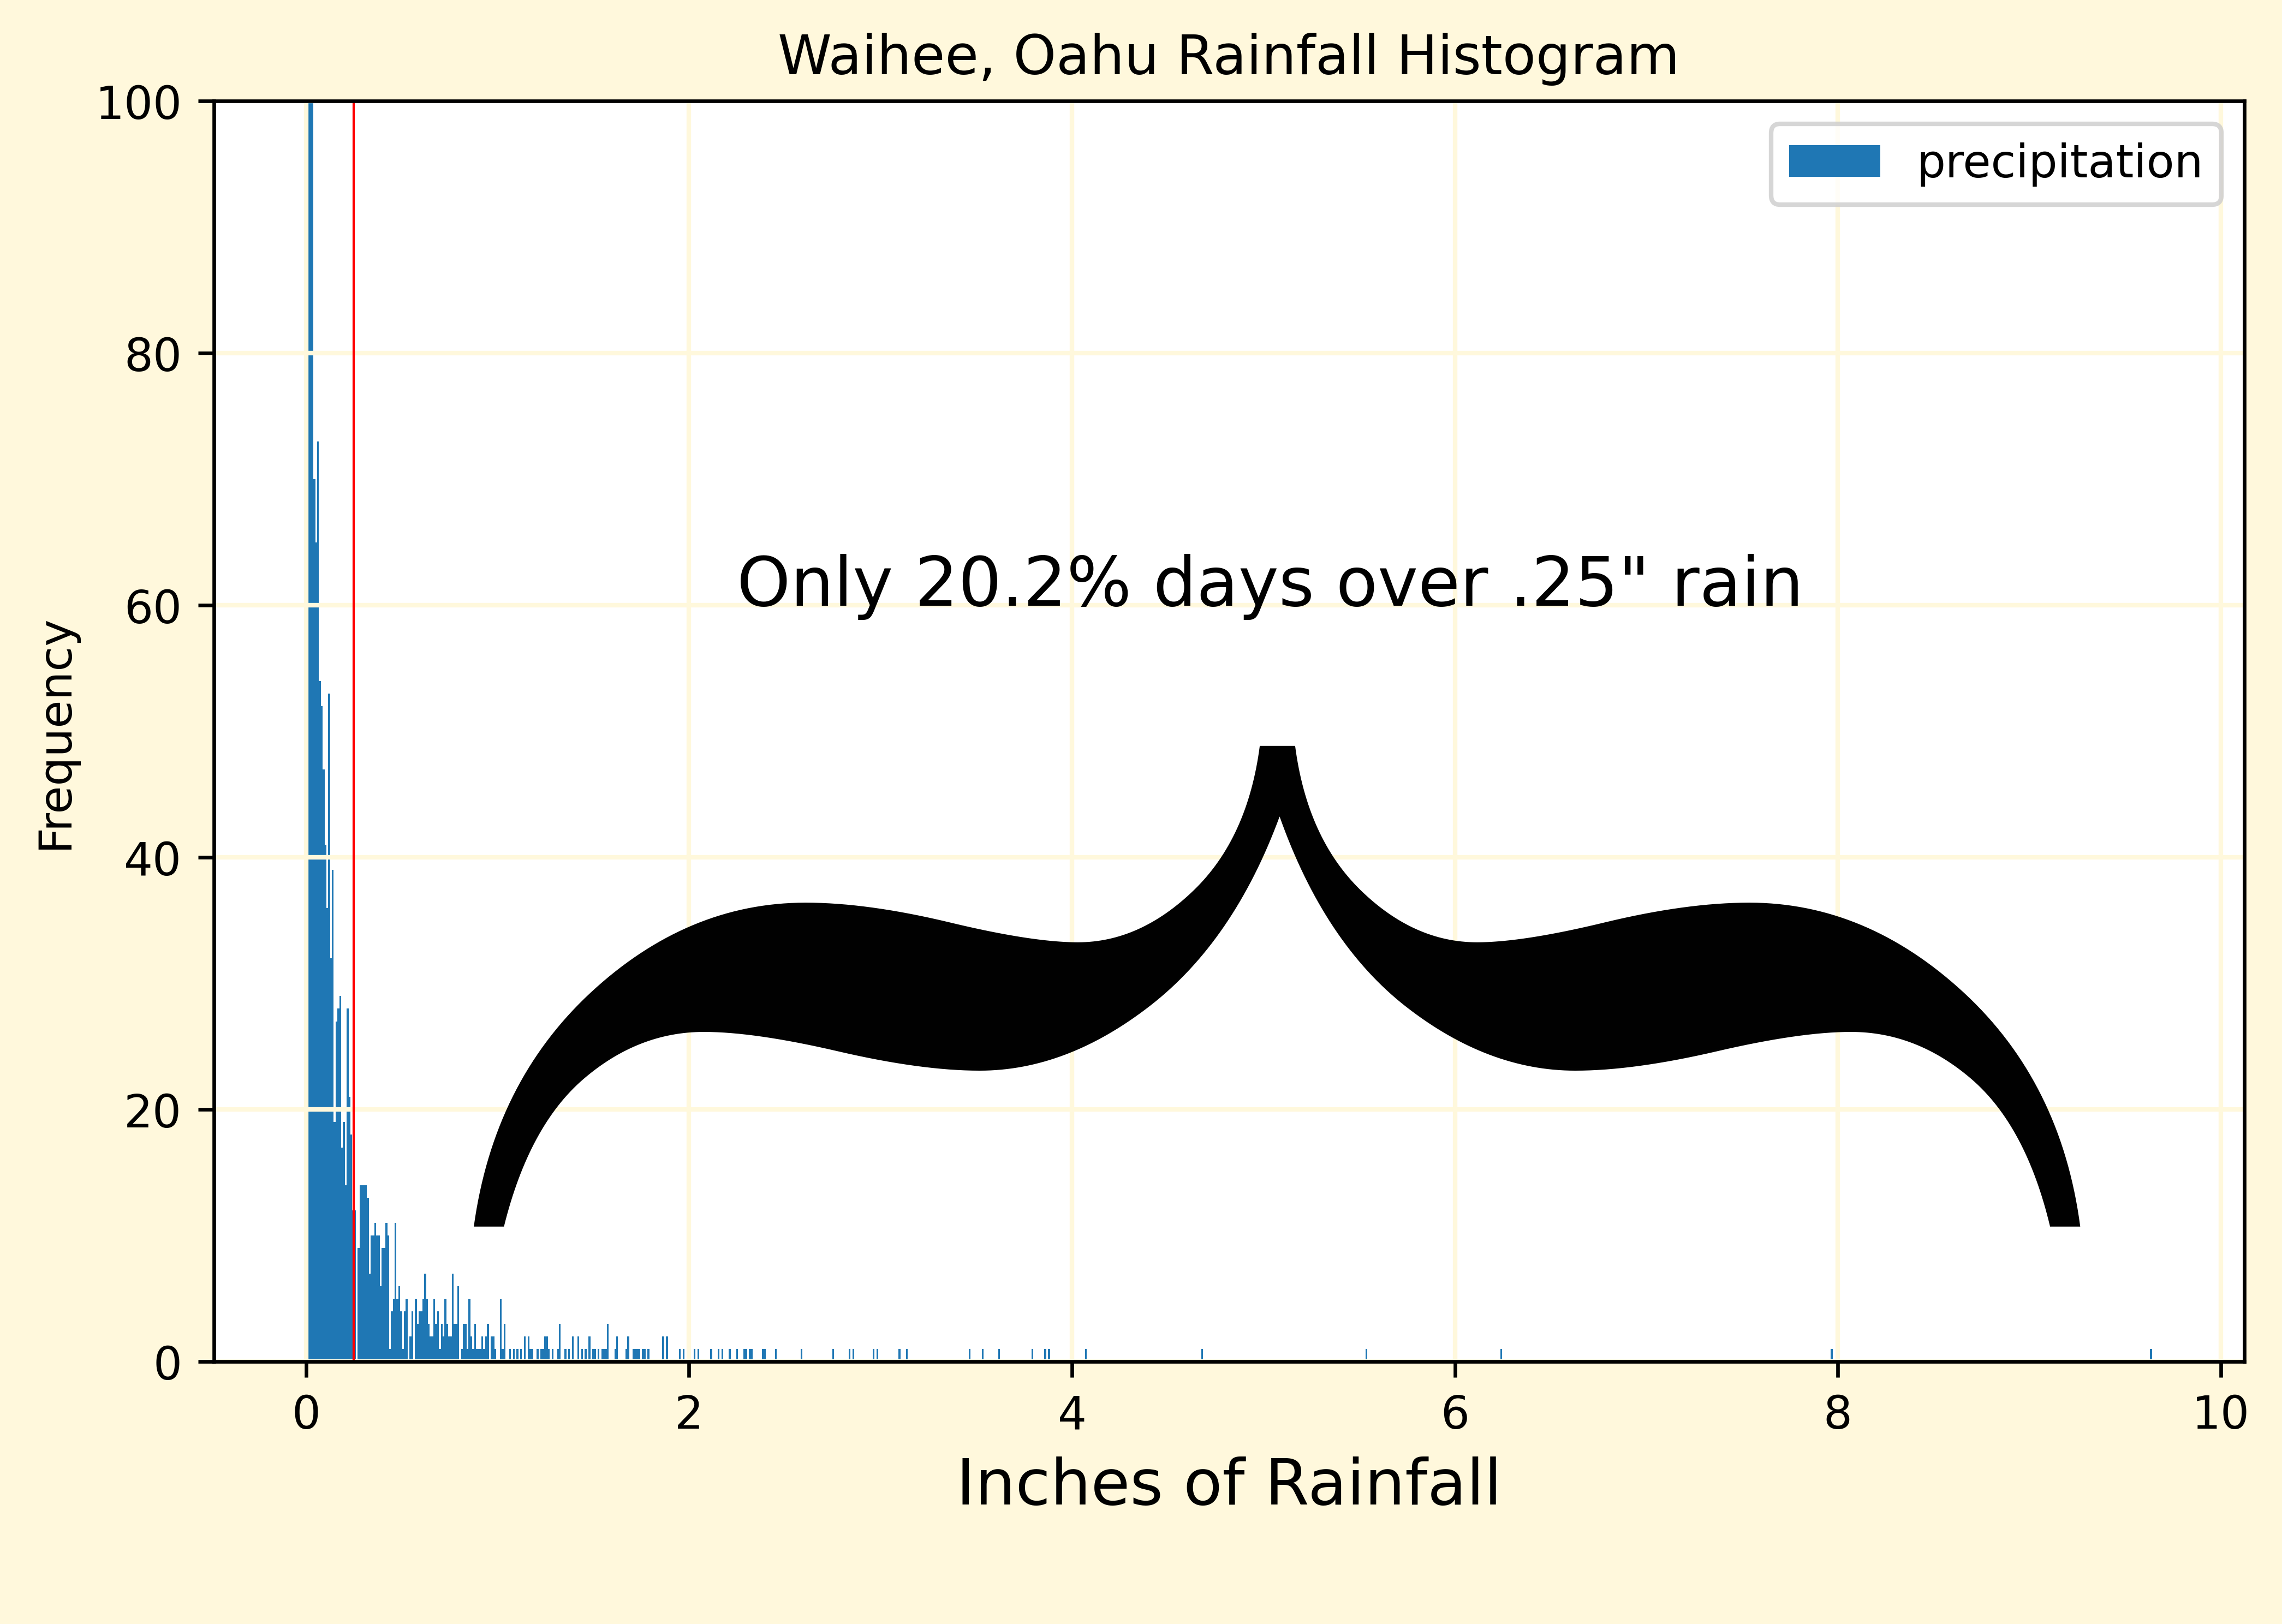

In [59]:
plt.rcdefaults()
df.plot.hist(bins=1000)
plt.ylim(bottom=0, top=100)
plt.xlabel('Inches of Rainfall', fontsize=14)
plt.axvline(.25,c='r',lw=.5)
above_quarter_inch = round(len(df[df['precipitation']>.25])/len(df)*100,2) 
plt.text(-.4,12,'{',rotation=-90,fontsize=388,**tfont)
 
tfont = {'fontname':'Times New Roman'}
plt.text(2.25,60,'Only '+str(above_quarter_inch)+'% days over .25" rain',fontsize=15)

plt.gca().grid(which='major', color='cornsilk', linewidth=1, alpha=1)   
plt.gcf().patch.set_facecolor('cornsilk')
plt.gcf().patch.set_alpha(1)
plt.gcf().set_size_inches(8, 5)
plt.gcf().set_dpi(600)
plt.title('Waihee, Oahu Rainfall Histogram')


plt.savefig('Resources/quarterinch.png', dpi=600)

plt.show()
plt.close()

### Temp Data Analysis

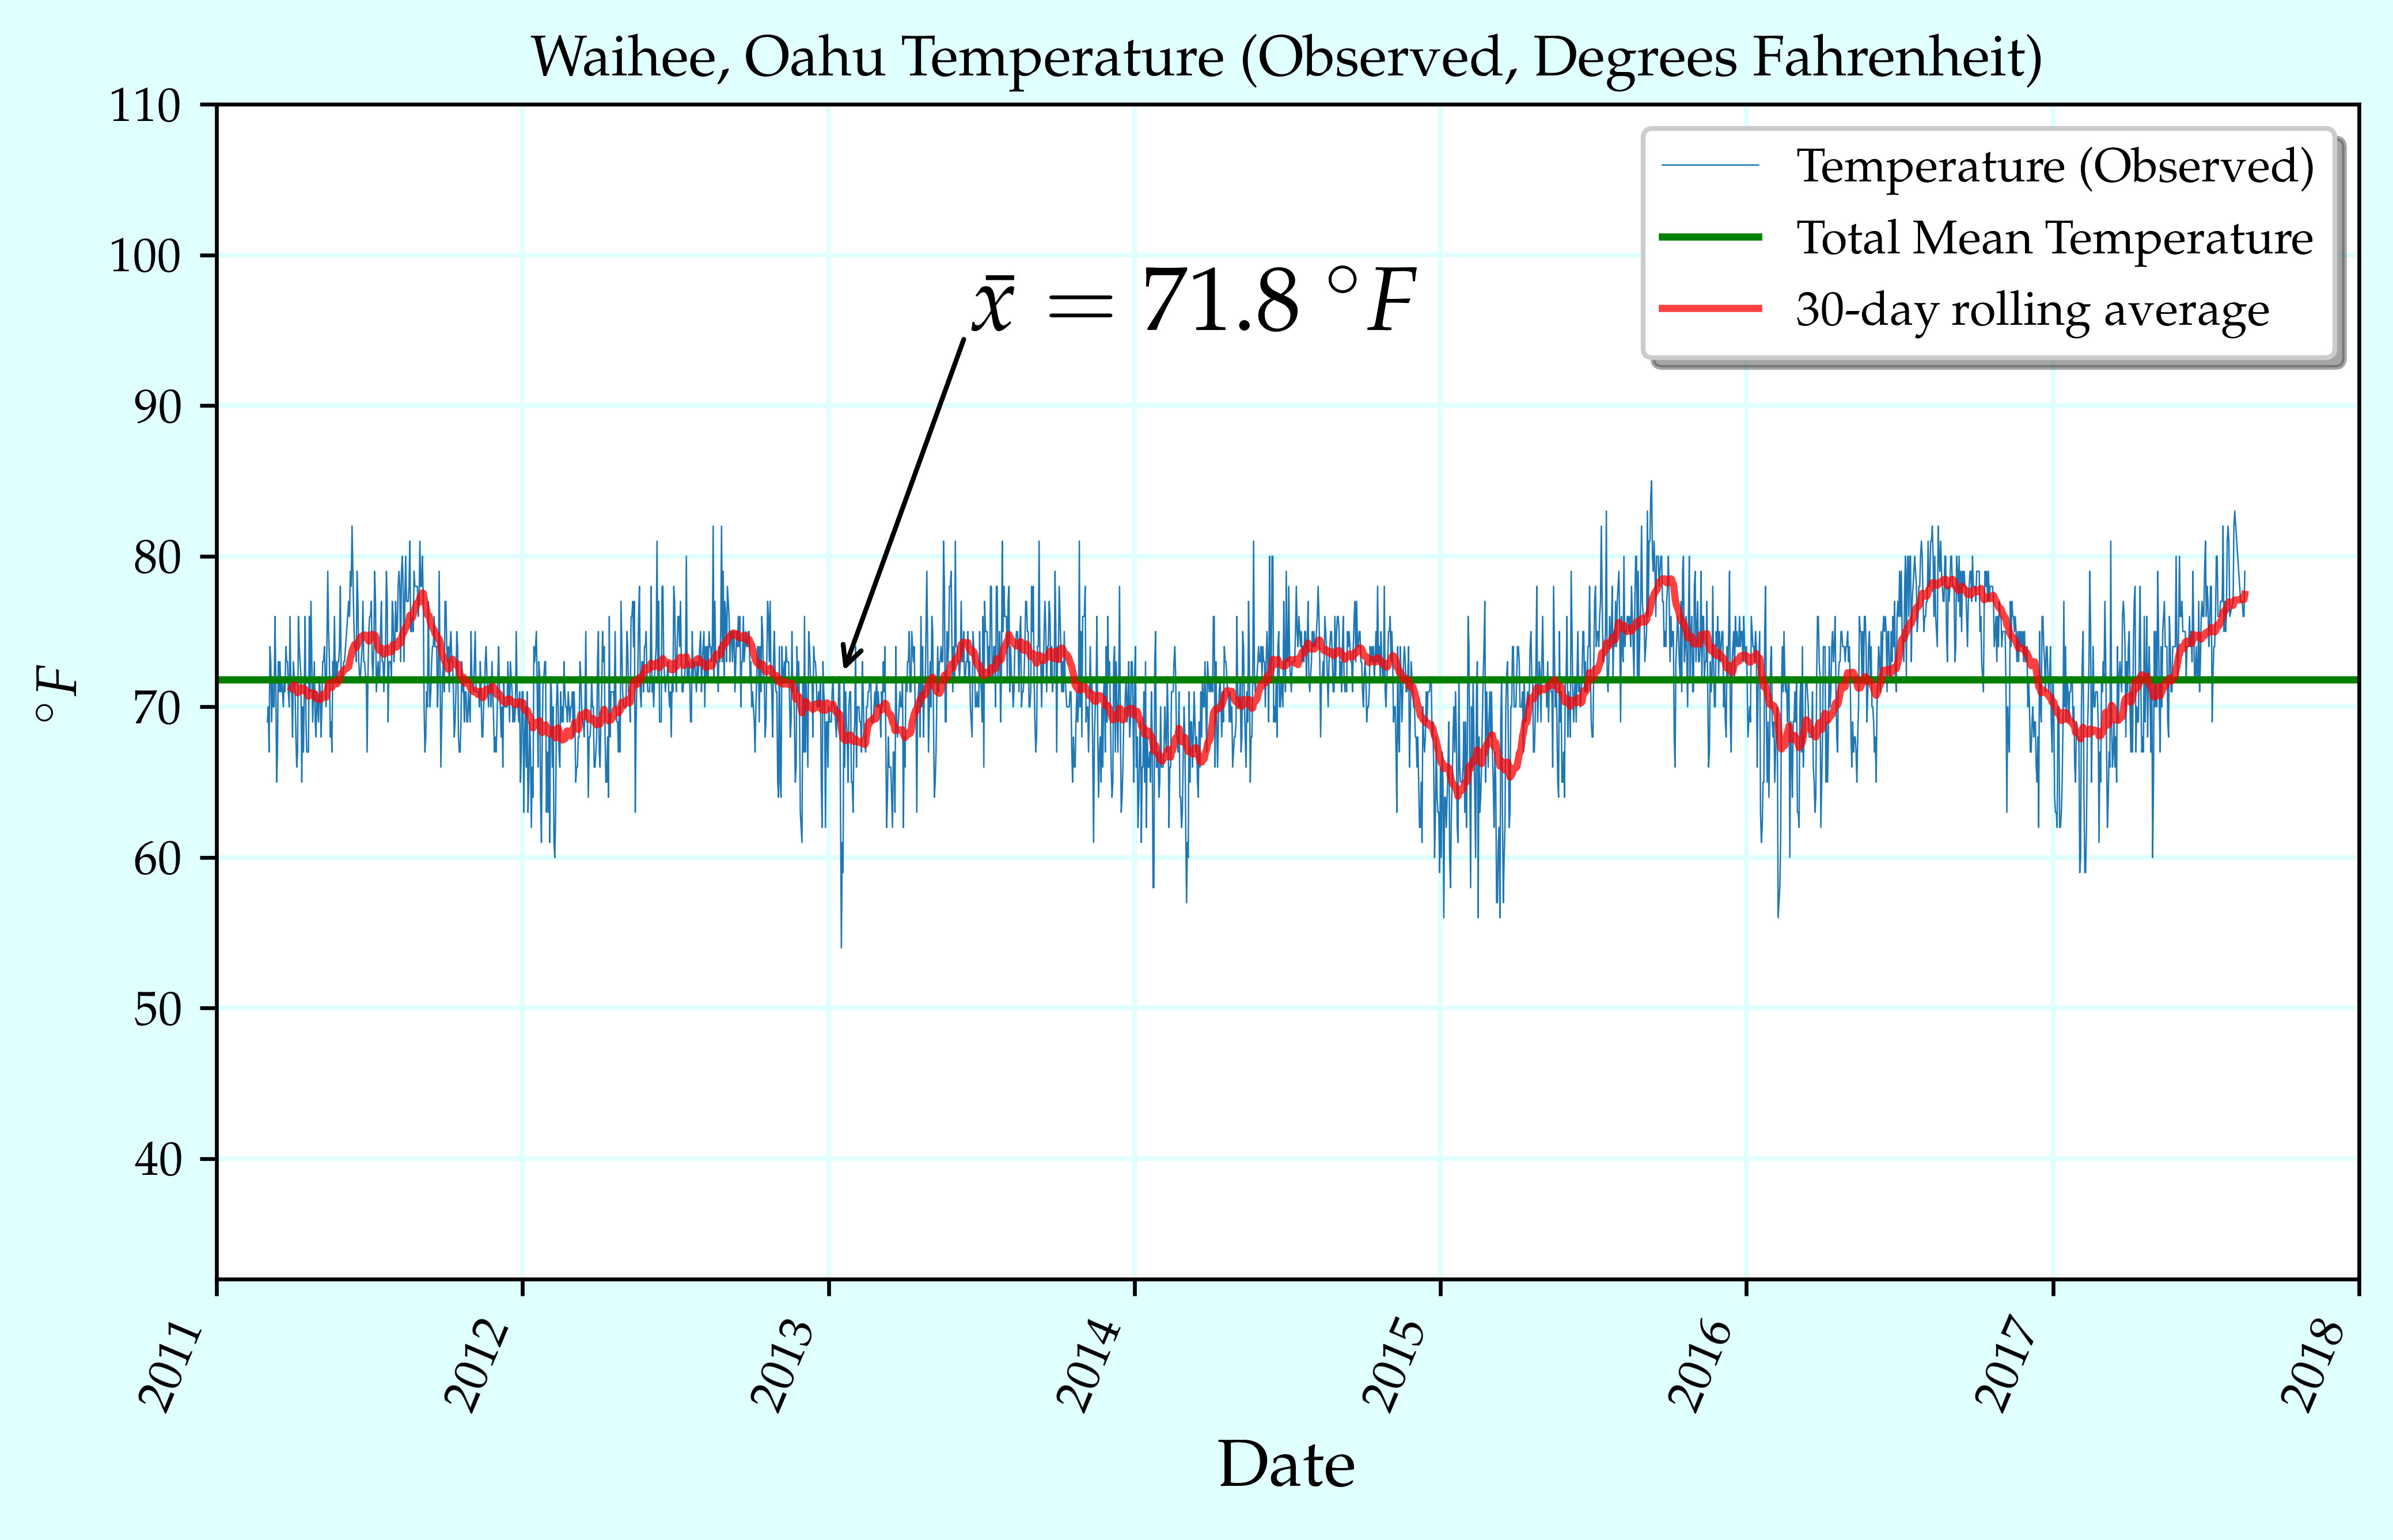

In [90]:
# Calculate many days back from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=2365)
# Perform a query to retrieve the data and precipitation scores
results = []

# Use data from most active WX station
results = session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','tobs'])
df.set_index(pd.to_datetime(df['date']), inplace=True)

df = df.rename(columns={'tobs': 'Temperature (Observed)'})

# Sort the dataframe by date
df = df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(lw=.3)
meantemp = df.describe(include='all').loc['mean']['Temperature (Observed)']
plt.axhline(y=meantemp, color='g', linestyle='-', label='Total Mean Temperature')

plt.gca().tick_params(axis="x", which="both", rotation=67)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.xlabel('Date', fontsize=14)
plt.ylabel(r' $^\circ F$', fontsize=12)

plt.ylim(bottom=32,top=110)
plt.xlim(left=pd.to_datetime('2011-01-01'),right=pd.to_datetime('2018-01-01'))

plt.gcf().patch.set_facecolor('lightcyan')
plt.gcf().patch.set_alpha(1)

plt.plot(df.rolling(30).mean(),label='30-day rolling average',alpha=.75,c='r')

plt.title('Waihee, Oahu Temperature (Observed, Degrees Fahrenheit)')

plt.gca().grid(which='major', color='lightcyan',  linewidth=1, alpha=1)  
plt.legend(fontsize='medium', shadow=True)


plt.annotate("", xy=(pd.to_datetime('2013-01-15'),meantemp),xytext=(pd.to_datetime('2013-06-15'), 95), arrowprops=dict(arrowstyle="->"))

tfont = {'fontname':'Times New Roman'}
plt.text(pd.to_datetime('2013-06-20'),95,r' $\bar x = $'+' '+str(round(meanrain,2))+r' $^\circ F$',**tfont,style='italic',fontsize=19)

plt.gcf().set_size_inches(8, 5)
plt.gcf().set_dpi(600)

plt.savefig('Resources/temp.png')
plt.show()
plt.close()

In [161]:
# Calculate many days back from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=2365)
# Perform a query to retrieve the data and precipitation scores
results = []

# Use data from most active WX station
results = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).\
filter(Measurement.prcp <= .25).\
filter(Measurement.tobs >= 66).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','tobs','prcp'])
df.set_index(pd.to_datetime(df['date']), inplace=True)



In [167]:
icecream = round(len(df)/(df.index[-1]-df.index[0]).days*100, 2)

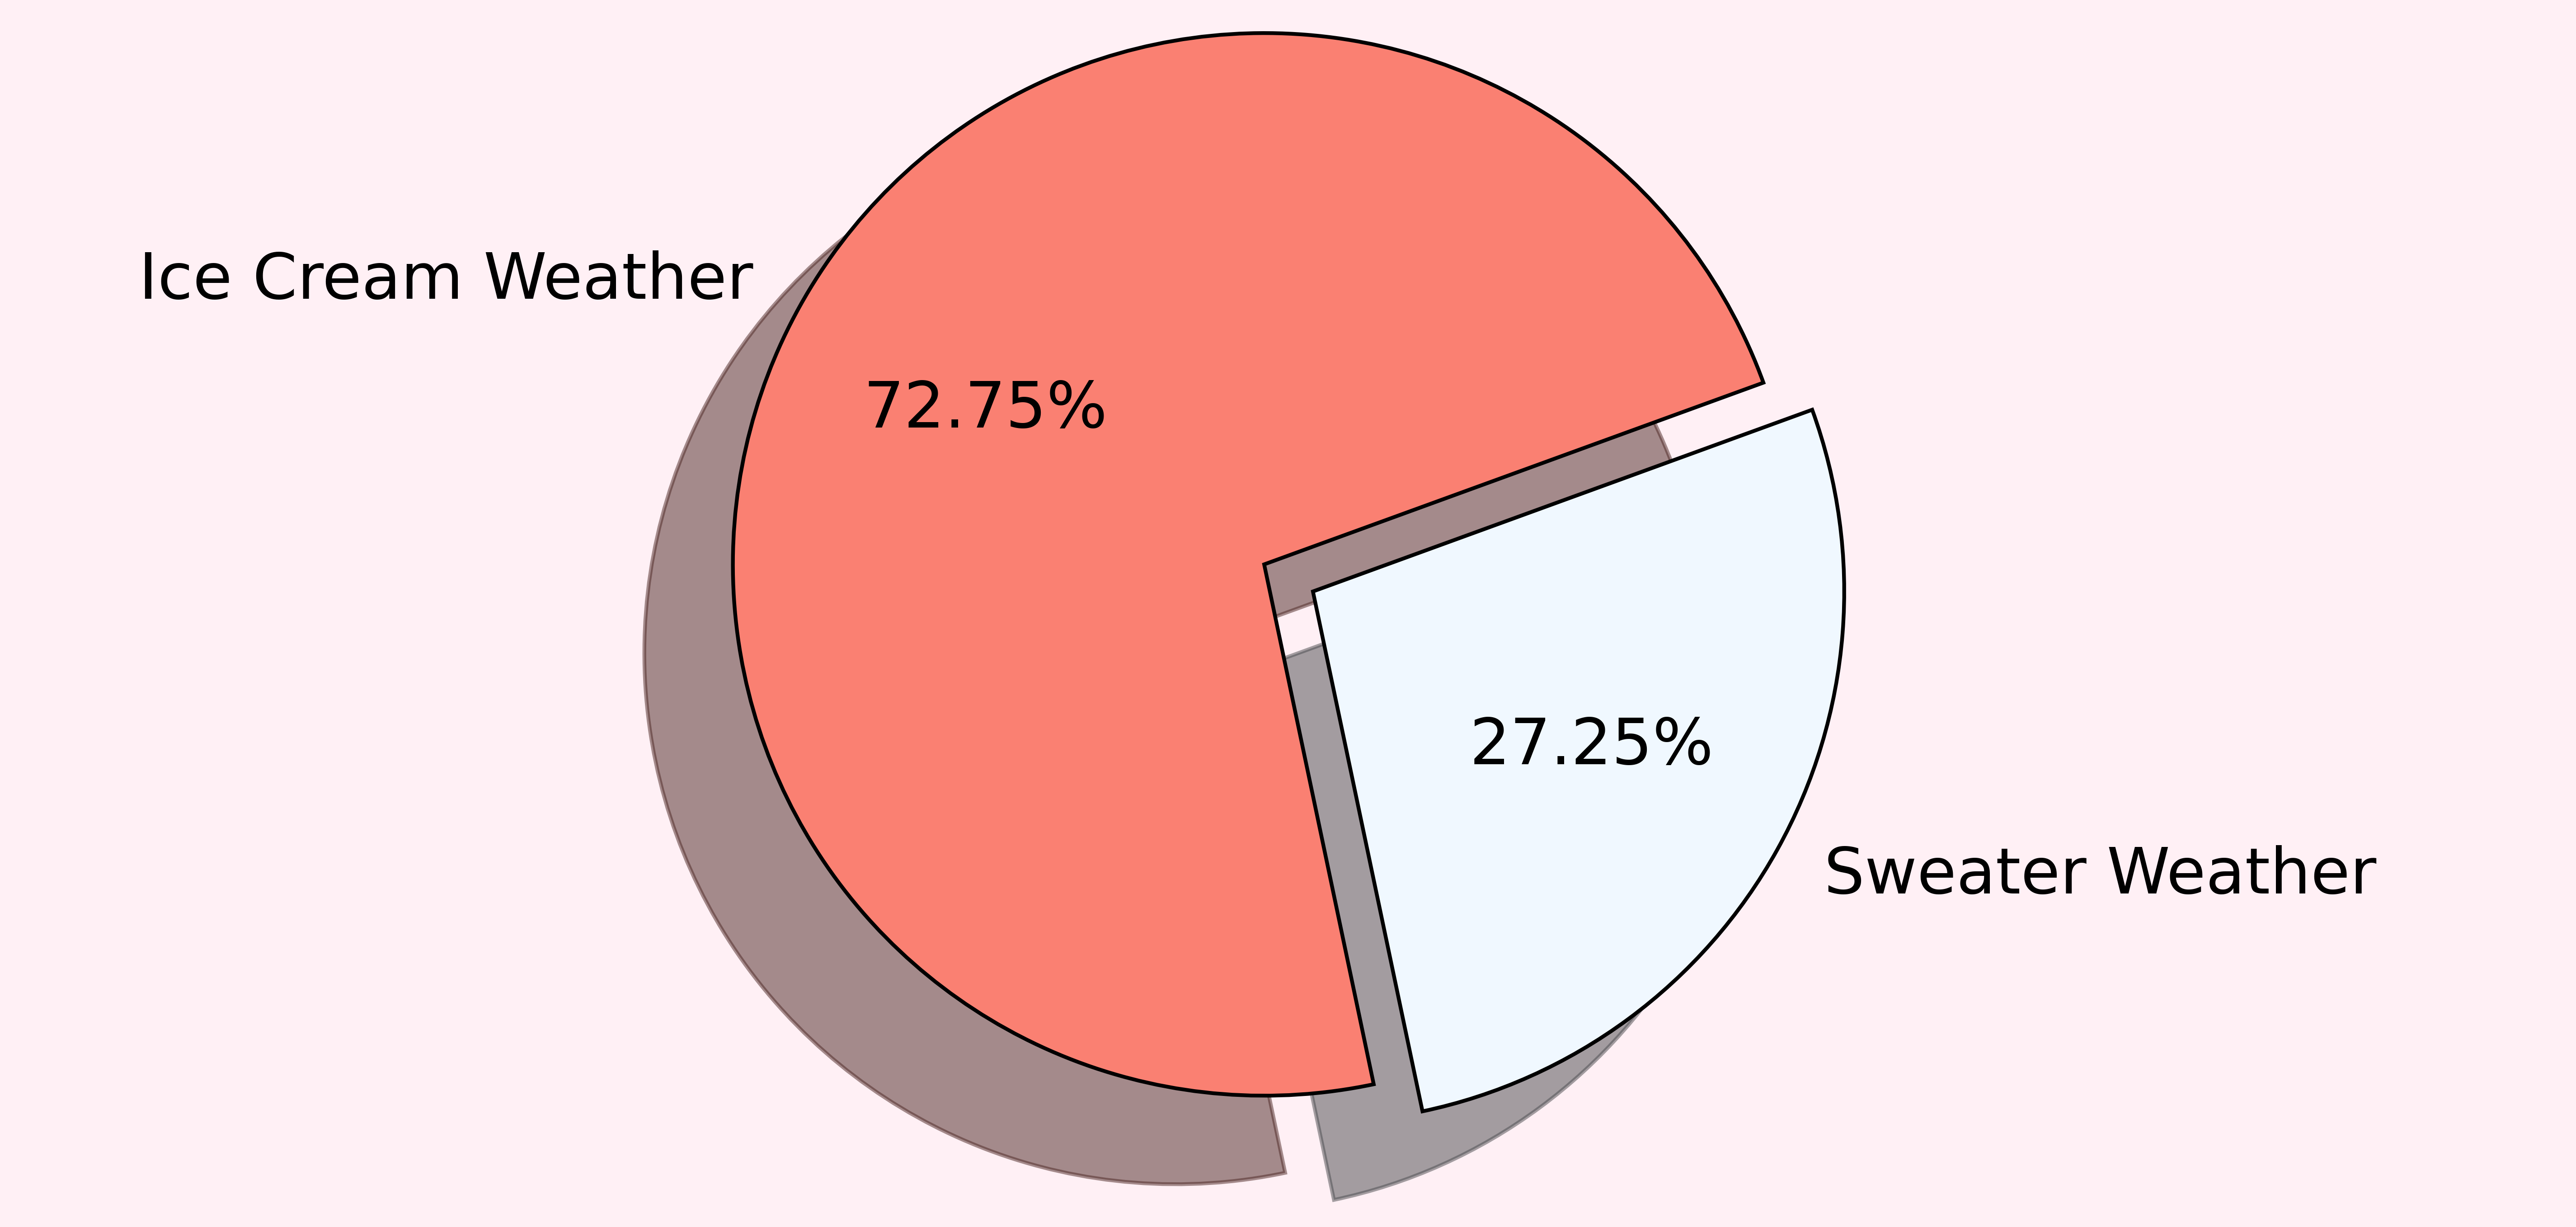

In [226]:
# from cycler import cycler
plt.style.use('classic')
labels = 'Ice Cream Weather', 'Sweater Weather'
sizes = [icecream, 100-icecream]
explode = (.105, 0)
colors = 'salmon', 'aliceblue'

 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, explode=explode, labels=labels, autopct=lambda p: '{:.2f}%'.format(p,(p/100)*100.0),
        shadow=True, startangle=20,  textprops={'fontsize': 17})

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.gcf().patch.set_facecolor('lavenderblush')
plt.gcf().patch.set_alpha(1)

plt.gcf().set_size_inches(12, 5)
plt.gcf().set_dpi(600)

plt.savefig('Resources/icecreamwx.png', dpi=600)

plt.show()
plt.close()